In [11]:
import pandas as pd
import sklearn
import sklearn.model_selection
# from autoPyTorch.api.tabular_classification import TabularClassificationTask
#from autoPyTorch.api.tabular_regression import TabularRegressionTask
from matplotlib import pyplot as plt
import numpy as np
#from torch import nn, optim
#import torch
#import torch.nn.functional as F
import catboost

In [12]:
data = pd.read_csv( "../training_from_eph.csv" )

In [13]:
y = data.output
X = data.loc[:,data.columns[5:]]
#y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    random_state=1,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [14]:
X_train.head()

,f1:sourceCorpusPermutationsFrequencyRatio,f2:targetCorpusPermutationsFrequencyRatio,f3:sourceAlignmentMemoryFrequencyRatio,f4:targetAlignmentMemoryFrequencyRatio,f5:frequencyRatioCorpusFiltered,f6:frequencyRatioAlignmentMemoryFiltered,f7:sourceCorpusLemmaPermutationsFrequencyRatio,f8:targetCorpusLemmaPermutationsFrequencyRatio,f9:sourceAlignmentMemoryLemmaFrequencyRatio,f10:targetAlignmentMemoryLemmaFrequencyRatio,...,f14:alignmentRelativeOccurrence,f15:alignmentPosition,f16:phrasePlausibility,f17:lemmaPhrasePlausibility,f18:ngramLength,f19:characterLength,f20:alignmentOccurrences,f21:lemmaAlignmentOccurrences,f22:uniqueness,f23:lemmaUniqueness
0,0.015267,0.002949,0,0,1.0,0,0.015267,0.002949,0,0,...,NaN,0.000000,1.000000,0,0.000000,0.000000,0.0,0,0.000000,0
1,0.023256,0.030303,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.415584,0.780110,0,0.773781,0.853483,1.0,0,0.608571,0
2,0.010309,0.025641,0,0,0.5,0,0.000000,0.000000,0,0,...,NaN,0.908654,0.390055,0,0.918612,0.849787,0.5,0,0.152143,0
3,0.025000,0.033333,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.507692,0.780110,0,0.498793,0.972239,1.0,0,0.608571,0
4,0.025000,0.033333,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.992308,0.780110,0,0.498793,0.488317,1.0,0,0.608571,0


In [15]:
from catboost import CatBoostRegressor, Pool

In [16]:
train_pool = Pool(
    data=X_train,
    label=y_train
)
validation_pool = Pool(
    data=X_test,
    label=y_test
)

In [18]:
model = CatBoostRegressor(
    iterations=1000,
    #task_type="GPU",
    learning_rate=.07
)
model.fit(train_pool, eval_set=validation_pool, verbose=True, plot=True)

print( 'Model is fitted: {}',format(model.is_fitted()))
print('Model params:\n{}'.format(model.get_params()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0703254	test: 0.0687853	best: 0.0687853 (0)	total: 6.04ms	remaining: 6.04s
1:	learn: 0.0695646	test: 0.0682021	best: 0.0682021 (1)	total: 11.2ms	remaining: 5.59s
2:	learn: 0.0688775	test: 0.0676961	best: 0.0676961 (2)	total: 15.8ms	remaining: 5.25s
3:	learn: 0.0682756	test: 0.0672204	best: 0.0672204 (3)	total: 20ms	remaining: 4.98s
4:	learn: 0.0675531	test: 0.0665048	best: 0.0665048 (4)	total: 24ms	remaining: 4.78s
5:	learn: 0.0670277	test: 0.0661133	best: 0.0661133 (5)	total: 30.1ms	remaining: 4.99s
6:	learn: 0.0666067	test: 0.0657627	best: 0.0657627 (6)	total: 34.3ms	remaining: 4.87s
7:	learn: 0.0662109	test: 0.0654762	best: 0.0654762 (7)	total: 39.3ms	remaining: 4.88s
8:	learn: 0.0658351	test: 0.0651658	best: 0.0651658 (8)	total: 43.2ms	remaining: 4.76s
9:	learn: 0.0653594	test: 0.0646964	best: 0.0646964 (9)	total: 47.3ms	remaining: 4.68s
10:	learn: 0.0648438	test: 0.0642170	best: 0.0642170 (10)	total: 51.5ms	remaining: 4.63s
11:	learn: 0.0645481	test: 0.0640668	best: 0.

107:	learn: 0.0566646	test: 0.0588329	best: 0.0588329 (107)	total: 393ms	remaining: 3.25s
108:	learn: 0.0566457	test: 0.0588280	best: 0.0588280 (108)	total: 397ms	remaining: 3.25s
109:	learn: 0.0566190	test: 0.0588223	best: 0.0588223 (109)	total: 401ms	remaining: 3.25s
110:	learn: 0.0565970	test: 0.0587993	best: 0.0587993 (110)	total: 406ms	remaining: 3.25s
111:	learn: 0.0565706	test: 0.0587896	best: 0.0587896 (111)	total: 418ms	remaining: 3.31s
112:	learn: 0.0565630	test: 0.0587936	best: 0.0587896 (111)	total: 422ms	remaining: 3.32s
113:	learn: 0.0565129	test: 0.0587828	best: 0.0587828 (113)	total: 427ms	remaining: 3.32s
114:	learn: 0.0564455	test: 0.0587810	best: 0.0587810 (114)	total: 432ms	remaining: 3.33s
115:	learn: 0.0564288	test: 0.0587719	best: 0.0587719 (115)	total: 437ms	remaining: 3.33s
116:	learn: 0.0564063	test: 0.0587492	best: 0.0587492 (116)	total: 441ms	remaining: 3.33s
117:	learn: 0.0563955	test: 0.0587480	best: 0.0587480 (117)	total: 446ms	remaining: 3.33s
118:	learn

206:	learn: 0.0539960	test: 0.0579410	best: 0.0579410 (206)	total: 783ms	remaining: 3s
207:	learn: 0.0539662	test: 0.0579406	best: 0.0579406 (207)	total: 787ms	remaining: 3s
208:	learn: 0.0539638	test: 0.0579429	best: 0.0579406 (207)	total: 791ms	remaining: 2.99s
209:	learn: 0.0539441	test: 0.0579412	best: 0.0579406 (207)	total: 795ms	remaining: 2.99s
210:	learn: 0.0539294	test: 0.0579338	best: 0.0579338 (210)	total: 799ms	remaining: 2.99s
211:	learn: 0.0539077	test: 0.0579344	best: 0.0579338 (210)	total: 803ms	remaining: 2.98s
212:	learn: 0.0538815	test: 0.0579340	best: 0.0579338 (210)	total: 807ms	remaining: 2.98s
213:	learn: 0.0538561	test: 0.0578820	best: 0.0578820 (213)	total: 810ms	remaining: 2.98s
214:	learn: 0.0538288	test: 0.0578674	best: 0.0578674 (214)	total: 814ms	remaining: 2.97s
215:	learn: 0.0538240	test: 0.0578626	best: 0.0578626 (215)	total: 817ms	remaining: 2.97s
216:	learn: 0.0538154	test: 0.0578705	best: 0.0578626 (215)	total: 821ms	remaining: 2.96s
217:	learn: 0.05

337:	learn: 0.0512695	test: 0.0573229	best: 0.0573202 (336)	total: 1.37s	remaining: 2.68s
338:	learn: 0.0512588	test: 0.0573160	best: 0.0573160 (338)	total: 1.38s	remaining: 2.68s
339:	learn: 0.0512244	test: 0.0573219	best: 0.0573160 (338)	total: 1.38s	remaining: 2.68s
340:	learn: 0.0512162	test: 0.0573258	best: 0.0573160 (338)	total: 1.39s	remaining: 2.68s
341:	learn: 0.0512086	test: 0.0573186	best: 0.0573160 (338)	total: 1.39s	remaining: 2.68s
342:	learn: 0.0511945	test: 0.0573289	best: 0.0573160 (338)	total: 1.4s	remaining: 2.68s
343:	learn: 0.0511618	test: 0.0573387	best: 0.0573160 (338)	total: 1.4s	remaining: 2.67s
344:	learn: 0.0511521	test: 0.0573324	best: 0.0573160 (338)	total: 1.41s	remaining: 2.67s
345:	learn: 0.0511351	test: 0.0573353	best: 0.0573160 (338)	total: 1.41s	remaining: 2.66s
346:	learn: 0.0511141	test: 0.0573197	best: 0.0573160 (338)	total: 1.41s	remaining: 2.66s
347:	learn: 0.0510884	test: 0.0573221	best: 0.0573160 (338)	total: 1.42s	remaining: 2.65s
348:	learn: 

472:	learn: 0.0494272	test: 0.0575477	best: 0.0572854 (359)	total: 1.96s	remaining: 2.18s
473:	learn: 0.0494119	test: 0.0575490	best: 0.0572854 (359)	total: 1.96s	remaining: 2.17s
474:	learn: 0.0494079	test: 0.0575494	best: 0.0572854 (359)	total: 1.96s	remaining: 2.17s
475:	learn: 0.0493951	test: 0.0575483	best: 0.0572854 (359)	total: 1.97s	remaining: 2.17s
476:	learn: 0.0493839	test: 0.0575484	best: 0.0572854 (359)	total: 1.97s	remaining: 2.16s
477:	learn: 0.0493662	test: 0.0575428	best: 0.0572854 (359)	total: 1.98s	remaining: 2.16s
478:	learn: 0.0493546	test: 0.0575433	best: 0.0572854 (359)	total: 1.98s	remaining: 2.15s
479:	learn: 0.0493392	test: 0.0575445	best: 0.0572854 (359)	total: 1.98s	remaining: 2.15s
480:	learn: 0.0493199	test: 0.0575492	best: 0.0572854 (359)	total: 1.99s	remaining: 2.14s
481:	learn: 0.0493145	test: 0.0575479	best: 0.0572854 (359)	total: 1.99s	remaining: 2.14s
482:	learn: 0.0493093	test: 0.0575466	best: 0.0572854 (359)	total: 1.99s	remaining: 2.13s
483:	learn

575:	learn: 0.0482940	test: 0.0575618	best: 0.0572854 (359)	total: 2.35s	remaining: 1.73s
576:	learn: 0.0482821	test: 0.0575673	best: 0.0572854 (359)	total: 2.35s	remaining: 1.72s
577:	learn: 0.0482759	test: 0.0575641	best: 0.0572854 (359)	total: 2.36s	remaining: 1.72s
578:	learn: 0.0482687	test: 0.0575656	best: 0.0572854 (359)	total: 2.36s	remaining: 1.72s
579:	learn: 0.0482565	test: 0.0575667	best: 0.0572854 (359)	total: 2.36s	remaining: 1.71s
580:	learn: 0.0482472	test: 0.0575688	best: 0.0572854 (359)	total: 2.37s	remaining: 1.71s
581:	learn: 0.0482307	test: 0.0575770	best: 0.0572854 (359)	total: 2.37s	remaining: 1.7s
582:	learn: 0.0482235	test: 0.0575727	best: 0.0572854 (359)	total: 2.37s	remaining: 1.7s
583:	learn: 0.0482179	test: 0.0575729	best: 0.0572854 (359)	total: 2.38s	remaining: 1.69s
584:	learn: 0.0482024	test: 0.0575812	best: 0.0572854 (359)	total: 2.38s	remaining: 1.69s
585:	learn: 0.0481904	test: 0.0575782	best: 0.0572854 (359)	total: 2.38s	remaining: 1.69s
586:	learn: 

680:	learn: 0.0471717	test: 0.0577242	best: 0.0572854 (359)	total: 2.74s	remaining: 1.28s
681:	learn: 0.0471508	test: 0.0577283	best: 0.0572854 (359)	total: 2.74s	remaining: 1.28s
682:	learn: 0.0471272	test: 0.0577235	best: 0.0572854 (359)	total: 2.75s	remaining: 1.28s
683:	learn: 0.0471165	test: 0.0577260	best: 0.0572854 (359)	total: 2.75s	remaining: 1.27s
684:	learn: 0.0471076	test: 0.0577174	best: 0.0572854 (359)	total: 2.76s	remaining: 1.27s
685:	learn: 0.0470861	test: 0.0577129	best: 0.0572854 (359)	total: 2.76s	remaining: 1.26s
686:	learn: 0.0470800	test: 0.0577132	best: 0.0572854 (359)	total: 2.76s	remaining: 1.26s
687:	learn: 0.0470708	test: 0.0577178	best: 0.0572854 (359)	total: 2.77s	remaining: 1.25s
688:	learn: 0.0470633	test: 0.0577212	best: 0.0572854 (359)	total: 2.77s	remaining: 1.25s
689:	learn: 0.0470530	test: 0.0577218	best: 0.0572854 (359)	total: 2.77s	remaining: 1.25s
690:	learn: 0.0470471	test: 0.0577223	best: 0.0572854 (359)	total: 2.78s	remaining: 1.24s
691:	learn

787:	learn: 0.0459498	test: 0.0578359	best: 0.0572854 (359)	total: 3.13s	remaining: 843ms
788:	learn: 0.0459417	test: 0.0578404	best: 0.0572854 (359)	total: 3.14s	remaining: 839ms
789:	learn: 0.0459328	test: 0.0578427	best: 0.0572854 (359)	total: 3.14s	remaining: 835ms
790:	learn: 0.0459234	test: 0.0578360	best: 0.0572854 (359)	total: 3.14s	remaining: 831ms
791:	learn: 0.0459158	test: 0.0578406	best: 0.0572854 (359)	total: 3.15s	remaining: 827ms
792:	learn: 0.0459056	test: 0.0578408	best: 0.0572854 (359)	total: 3.15s	remaining: 823ms
793:	learn: 0.0458898	test: 0.0578460	best: 0.0572854 (359)	total: 3.15s	remaining: 819ms
794:	learn: 0.0458814	test: 0.0578484	best: 0.0572854 (359)	total: 3.16s	remaining: 814ms
795:	learn: 0.0458731	test: 0.0578507	best: 0.0572854 (359)	total: 3.16s	remaining: 810ms
796:	learn: 0.0458618	test: 0.0578569	best: 0.0572854 (359)	total: 3.17s	remaining: 806ms
797:	learn: 0.0458568	test: 0.0578574	best: 0.0572854 (359)	total: 3.17s	remaining: 802ms
798:	learn

899:	learn: 0.0449738	test: 0.0579097	best: 0.0572854 (359)	total: 3.52s	remaining: 392ms
900:	learn: 0.0449632	test: 0.0579012	best: 0.0572854 (359)	total: 3.53s	remaining: 388ms
901:	learn: 0.0449605	test: 0.0579034	best: 0.0572854 (359)	total: 3.53s	remaining: 384ms
902:	learn: 0.0449397	test: 0.0579010	best: 0.0572854 (359)	total: 3.54s	remaining: 380ms
903:	learn: 0.0449358	test: 0.0579027	best: 0.0572854 (359)	total: 3.54s	remaining: 376ms
904:	learn: 0.0449258	test: 0.0579086	best: 0.0572854 (359)	total: 3.54s	remaining: 372ms
905:	learn: 0.0449191	test: 0.0579099	best: 0.0572854 (359)	total: 3.55s	remaining: 368ms
906:	learn: 0.0449057	test: 0.0579093	best: 0.0572854 (359)	total: 3.55s	remaining: 364ms
907:	learn: 0.0448949	test: 0.0579091	best: 0.0572854 (359)	total: 3.56s	remaining: 360ms
908:	learn: 0.0448807	test: 0.0579131	best: 0.0572854 (359)	total: 3.56s	remaining: 356ms
909:	learn: 0.0448759	test: 0.0579148	best: 0.0572854 (359)	total: 3.56s	remaining: 352ms
910:	learn

Model is fitted: {} True
Model params:
{'iterations': 1000, 'learning_rate': 0.07, 'loss_function': 'RMSE'}


In [19]:
y_pred_ = model.predict(X)
y_     = y

<IPython.core.display.Javascript object>


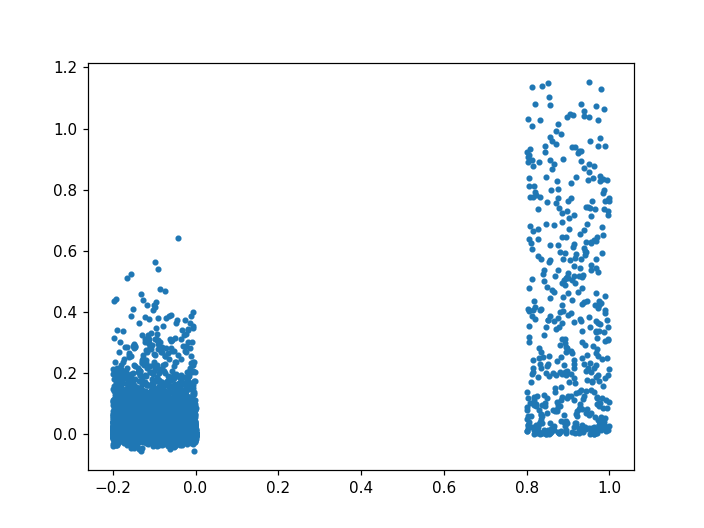

In [20]:
%matplotlib notebook
import random
y_shuff = [x+(random.random()*.2-.2) for x in y_]
plt.plot(y_shuff,y_pred_,'.')

In [21]:
#data[:,fishy_index[0][0]]
fishy_index = np.where((y_<.4)&(y_pred_>.5))
data.loc[fishy_index[0][1],:]

output                                                   0
source                                               n:καὶ
target                                               n:and
f:sLang                                               ugnt
f:tLang                                                 en
f1:sourceCorpusPermutationsFrequencyRatio         0.028209
f2:targetCorpusPermutationsFrequencyRatio         0.039188
f3:sourceAlignmentMemoryFrequencyRatio                   0
f4:targetAlignmentMemoryFrequencyRatio                   0
f5:frequencyRatioCorpusFiltered                      0.125
f6:frequencyRatioAlignmentMemoryFiltered                 0
f7:sourceCorpusLemmaPermutationsFrequencyRatio         0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio         0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio              0
f10:targetAlignmentMemoryLemmaFrequencyRatio             0
f11:lemmaFrequencyRatioCorpusFiltered                  0.0
f12:lemmaFrequencyRatioAlignmentMemoryFiltered          

In [22]:
data.loc[fishy_index[0],["source","target"]]

,source,target
5377,n:ἐν,n:in
28139,n:καὶ,n:and
54900,n:ἐν,n:to
82054,n:κυρίῳ,n:lord
91416,n:ψυχῆς,n:soul


In [23]:
fishy_low = np.where((y_>.4)&(y_pred_<.001))
#print(fishy_low[0][2])
data.loc[fishy_low[0][1],:]

output                                                        1
source                                            n:τὴν:σύνεσίν
target                                                n:insight
f:sLang                                                    ugnt
f:tLang                                                      en
f1:sourceCorpusPermutationsFrequencyRatio              0.018182
f2:targetCorpusPermutationsFrequencyRatio              0.027778
f3:sourceAlignmentMemoryFrequencyRatio                        0
f4:targetAlignmentMemoryFrequencyRatio                        0
f5:frequencyRatioCorpusFiltered                             1.0
f6:frequencyRatioAlignmentMemoryFiltered                      0
f7:sourceCorpusLemmaPermutationsFrequencyRatio              0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio              0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio                   0
f10:targetAlignmentMemoryLemmaFrequencyRatio                  0
f11:lemmaFrequencyRatioCorpusFiltered   

In [ ]:
#loading and saving
#https://automl.github.io/Auto-PyTorch/development/examples/40_advanced/example_visualization.html#sphx-glr-examples-40-advanced-example-visualization-py